**DS 301: Applied Data Modeling and Predictive Analysis**

**Lecture 22 – Getting started with TensorFlow 2.0 and Keras**

# MLP Classifier with Fashion MNIST Dataset

Nok Wongpiromsarn, 8 August 2022

**Credit:** The large portion of the code has been taken from Chapter 10 of Aurélien Géron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow

**Download Fashion MNIST using Keras**

In [1]:
from tensorflow import keras

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


**Create the validation set and scale the input features**

In [2]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
print(y_train[0])

4


**Create the model using the Sequential API**

In [3]:
model = keras.models.Sequential()

# A layer that converts each input image into a 1D array, i.e., outputing x.respae(-1, 1) for any input x
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Add a dense layer with 300 neurons, using the ReLU activation function
model.add(keras.layers.Dense(300, activation="relu"))

# Add a second Dense hidden layer with 100 neurons, using the ReLU activation function
model.add(keras.layers.Dense(100, activation="relu"))

# Add a Dense output layer with 10 neurons (one per class), using the softmax activation function 
# (because this is multiclass classification)
model.add(keras.layers.Dense(10, activation="softmax"))

# Displays all the model’s layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Access the (initialized) parameters of the first hidden layer

hidden1 = model.get_layer('dense')
weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)
print(weights)
print(biases)

(784, 300)
(300,)
[[-0.03533695  0.04255292 -0.02131045 ...  0.04952759 -0.07238416
   0.06992249]
 [ 0.02107994 -0.00555824  0.05662544 ...  0.02623065  0.0027222
   0.03293797]
 [ 0.00147016 -0.03892547  0.01248933 ... -0.06697627 -0.03577809
  -0.00466137]
 ...
 [ 0.07290508  0.00010181 -0.06950482 ...  0.01212712  0.0611874
  -0.00021223]
 [ 0.0269459   0.07426748  0.03159744 ... -0.03087666 -0.01799447
  -0.00303255]
 [ 0.00091799  0.02009179 -0.01682577 ... -0.04043104 -0.03549981
  -0.05871348]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", 
              metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7163 - accuracy: 0.7647 - val_loss: 0.5145 - val_accuracy: 0.8242
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4842 - accuracy: 0.8297 - val_loss: 0.4346 - val_accuracy: 0.8562
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4378 - accuracy: 0.8460 - val_loss: 0.4350 - val_accuracy: 0.8518
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4117 - accuracy: 0.8555 - val_loss: 0.4054 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3936 - accuracy: 0.8605 - val_loss: 0.3980 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3773 - accuracy: 0.8666 - val_loss: 0.3806 - val_accuracy: 0.8642
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3634 - accuracy: 0.8712 - val_loss: 0.3552 - val_accuracy:

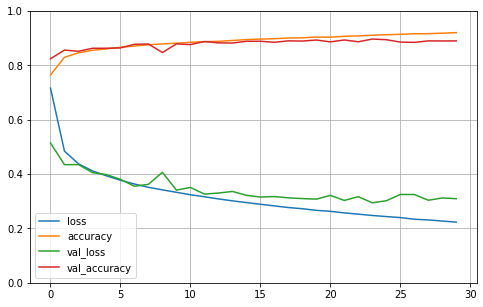

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [8]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 70.6886 - accuracy: 0.8378


[70.68855285644531, 0.8378000259399414]

In [9]:
X_new = X_test[5:10]
y_proba = model.predict(X_new)
y_proba

1/1 [==============================] - 0s 63ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [10]:
y_test[5:10]

array([1, 4, 6, 5, 7], dtype=uint8)